In [1]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the data
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=  pd.read_csv('train.csv')


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


In [6]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(60000, 784)


In [7]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(x_subset)

Wall time: 0 ns
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.446s...
[t-SNE] Computed neighbors for 10000 samples in 302.863s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 430.064784
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.996750
[t-SNE] KL divergence after 300 iterations: 2.627578


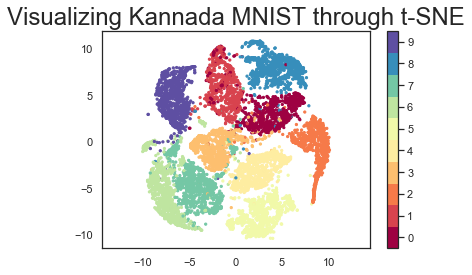

In [9]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

In [10]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [11]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(pca_result_50)

Wall time: 998 µs
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.040s...
[t-SNE] Computed neighbors for 10000 samples in 11.773s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 305.644567
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.061371
[t-SNE] KL divergence after 300 iterations: 2.553438


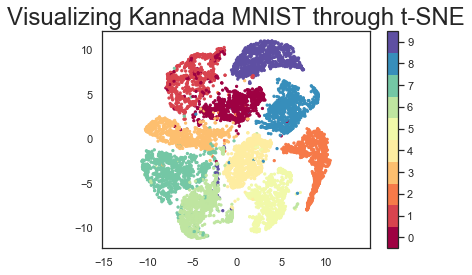

In [12]:
#visualising t-SNE again 

plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);